# Business Understanding 


# <u>**Predicting Customer Churn in Telecommunications**: A Machine Learning Approach</u>

### ***Description:***
### This project aims to develop a machine learning model to predict customer churn in a telecommunications company. By leveraging historical customer data, including usage patterns, demographics, and service subscriptions, the model will identify customers at risk of churning. This predictive capability will enable the company to implement targeted retention strategies and improve customer retention rates.


### ***Problem Statement:*** Telecommunications companies face significant challenges in retaining customers due to the competitive nature of the industry and the ease with which customers can switch providers. Customer churn, the rate at which customers discontinue their services, can have a substantial impact on revenue and profitability. Therefore, it is crucial for telecommunications companies to proactively identify customers at risk of churning and implement effective retention strategies.
### ***Objective:*** The objective of the project is to develop a machine learning model that accurately predicts customer churn for a telecommunications company.
### ***Business Success Criteria:*** The success of the project will be measured by the model's ability to accurately identify customers at risk of churning, thereby allowing the company to implement proactive retention strategies and minimize customer attrition. Specifically, achieving a high accuracy, precision, and recall in predicting churn will be key success metrics.
### ***Select Technologies and Tools:*** Choose appropriate machine learning frameworks (e.g., TensorFlow, scikit-learn) and data processing tools (e.g., pandas, SQL) for model development. Decide on visualization libraries (e.g., Matplotlib, Seaborn) for result interpretation.
### ***Risks and Contingencies:*** Identify potential risks such as data quality issues, model overfitting, or regulatory compliance. Develop contingency plans to address these risks and mitigate their impact on project timelines and outcomes.
### ***Cost Benefit Analysis:*** Conduct a cost-benefit analysis to determine the financial implications of implementing the churn prediction model compared to the potential revenue losses resulting from customer churn.

### **HYPOTHESIS**

**(H0)** ***Null Hypothesis:*** There is no significant relationship between MonthlyCharges and whether a customer churns

**(H1)** ***Alternative Hypothesis:*** There is significant relationship between MonthlyCharges and whether a customer churns


### **Business Questions**
1. What is the relationship between totalcharges and customers churning?

2. What is the relationship between monthlycharges and customers churning?

3. Which customer gender churned the most?

4. Between the male and female gender who were charged the most on a monthly basis? 

5. Customers that churned were mostly using which type of InternetService?

In [83]:
# importing necessary libraries
### libraries for data manipulation
import pandas as pd
import numpy as np
import openpyxl
## packages for importing data from database
import pyodbc
import os
from dotenv import dotenv_values
import warnings 
warnings.filterwarnings('ignore')

## packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## packages for Hypothesis Testing
from scipy.stats import mannwhitneyu

## packages for MachineLearning
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler,OneHotEncoder,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
import xgboost as xgb
from xgboost import XGBClassifier
import catboost as cb
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV





print("all modules are imported")


all modules are imported


## **Loading of datasets**

In [7]:
## loading environmental variables from .env
environment_variables = dotenv_values(".env")

##Getting values of the credentials set in the .env file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USER")
password = environment_variables.get("PASSWORD")
 
 ## CREATING A CONNECTION
connection_string = f"DRIVER=SQL Server;SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"
connection = pyodbc.connect(connection_string)

In [8]:
query_1 = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"
df1 = pd.read_sql(query_1,connection)
df1.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [9]:
df2 = pd.read_csv("data sets\LP2_Telco-churn-second-2000.csv")
df2.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [10]:
df3= pd.read_excel("data sets\Telco-churn-last-2000.xlsx")
df3.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


# **N\B**
### **df1** dataset and **df2** dataset are for training and evaluation thus we are going to concatenate the two 
### **df3** dataset is for testing the model

## ***CONCATENATION***

In [11]:
## for loop to replace the values in df1 to align with those of df2 before concatenating 
for column in df1.columns:
    df1[column]=df1[column].replace({False:"No",True:"Yes",None:"No"})
    print(column,'unique values')
    print(df1[column].unique())
    print("=="*50) 

customerID unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '1891-FZYSA' '4770-UEZOX'
 '1A1:U3001038-RQOST']
gender unique values
['Female' 'Male']
SeniorCitizen unique values
['No' 'Yes']
Partner unique values
['Yes' 'No']
Dependents unique values
['No' 'Yes']
tenure unique values
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values
['No' 'Yes']
MultipleLines unique values
['No' 'Yes']
InternetService unique values
['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values
['No' 'Yes']
OnlineBackup unique values
['Yes' 'No']
DeviceProtection unique values
['No' 'Yes']
TechSupport unique values
['No' 'Yes']
StreamingTV unique values
['No' 'Yes']
StreamingMovies unique values
['No' 'Yes']
Contract unique values
['Month-to-month' 'One year' 'Two year']
PaperlessBilling unique values
['Ye

In [12]:
## for loop to replace the values in df2 to align with those of df1 before concatenating 
df2['SeniorCitizen']=df2['SeniorCitizen'].replace({0:'No',1:'Yes'})
for column in df2.columns:
    df2[column]=df2[column].replace({'No phone service':"No",'No internet service':"No"})
    print(column,'unique values')
    print(df2[column].unique())
    print("=="*50) 

customerID unique values
['5600-PDUJF' '8292-TYSPY' '0567-XRHCU' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender unique values
['Male' 'Female']
SeniorCitizen unique values
['No' 'Yes']
Partner unique values
['No' 'Yes']
Dependents unique values
['No' 'Yes']
tenure unique values
[ 6 19 69 11 64 39 15 25 66 61 43 12 23 71 34  5 41 72 14  1 10  7  9 48
 20 16  2 22 35 54 56 18 68 53 30 36 55 21 33 44  4 49 42 67 40 45 57  8
 65  3 17 28 52 47 50 46 29 27 13 24 62 26 60 51 70 59 38 37  0 58 31 32
 63]
PhoneService unique values
['Yes' 'No']
MultipleLines unique values
['No' 'Yes']
InternetService unique values
['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values
['No' 'Yes']
OnlineBackup unique values
['No' 'Yes']
DeviceProtection unique values
['No' 'Yes']
TechSupport unique values
['Yes' 'No']
StreamingTV unique values
['No' 'Yes']
StreamingMovies unique values
['No' 'Yes']
Contract unique values
['Month-to-month' 'Two year' 'One year']
PaperlessBilling unique values
['Yes' 'No']

In [13]:
## Concatenating df1 and df2
training_df=pd.concat([df1, df2]).reset_index(drop=True)
training_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


## ***Features***
| **Column**      | **Meaning** | 
|-----------------|-----------------|
| customerID  | Unique identifier of different customers | 
| gender  | sex of the customer male or female | 
| SeniorCitizen | 'No' to show customer is not a SeniorCitizen and 'Yes' to show a SeniorCitizen  | 
|Partner |indicates if the customer has a partner |
|Dependents |Shows if the customer has individuals depending on them |
|tenure | The period the customer has been using the company services |
|PhoneService | Indicates if the customer has a phone service |
|MultipleLines | Indicates if the customer has  MultipleLines |
|InternetService | Indicates if the customer has an InternetService |
|OnlineSecurity | Indicates if the customer has OnlineSecurity |
|OnlineBackup | Indicates if the customer has OnlineBackup |
|DeviceProtection | Indicates if the customer has DeviceProtection |
|TechSupport | Indicates if the customer has TechSupport |
|StreamingTV | Shows if the customer streams his or her tv |
|StreamingMovies| Shows if the customer streams his or her movies|
|Contract | Shows the type of contract the customer has |
|PaperlessBilling | Indicates if the customers billing was done on paper
|PaymentMethod | Shows the method used in buying services |
|MonthlyCharges | Amount paid by the customer on a monthly basis |
|TotalCharges | Amount the customer has paid throughout his or her tenure using the company services |
|Churn |Shows if the customer churned i.e stopped using the company's services |



### **<center>Exploratory Data Analysis</center>**
### ****<center>(EDA)</center>****

In [14]:
# GET INFORMATION ABOUT COLUMNS(MISSING VALUES, DATA TYPES)
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [15]:
## checking for missing values
training_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
Churn               0
dtype: int64

In [16]:
##Checking for duplicates
training_df[training_df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [17]:
training_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,5043,5043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,5043,2,Male,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,5043,2,No,4224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,5043,2,No,2585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,5043,2,No,3482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,5043.0,NaN,NaN,NaN,32.576641,24.529807,0.0,9.0,29.0,56.0,72.0
PhoneService,5043,2,Yes,4554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,5043,2,No,2913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,5043,3,Fiber optic,2248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,5043,2,No,3587,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Issues with train_df**

1. The TotalCharges column and the Tenure column  have the wrong datatype

2. There are missing values in the TotalCharges column

3. The customerID is not necessary in building the ML model

### **Course of Action**
1. Correct the Total Charges column datatype i.e using 'pd.to_numeric(df2['TotalCharges'], errors='coerce')'

2. For missing values we will leave them for now until when building pipelines

3. Drop the customerID column as it is not used or necessary 

## **DATA CLEANING**

In [18]:
# Remove single quotes from values in 'TotalCharges' column and convert to float
training_df['TotalCharges'] = training_df['TotalCharges'].str.replace("'", '')  # Remove single quotes
training_df['TotalCharges'] = pd.to_numeric(training_df['TotalCharges'], errors='coerce') 
training_df['TotalCharges'].unique()

array([    nan,  312.7 , 1046.5 , ...,  346.45,  306.6 , 6844.5 ])

In [19]:
# confirm the data type of the TotalCharges column 
training_df['TotalCharges'].dtype

dtype('float64')

In [20]:
##dropping the CUSTOMERID column
# Drop the 'customerID' column
training_df.drop(columns=['customerID'], inplace=True)

# Now, training_df doesn't have the 'customerID' column
training_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,NaN,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,NaN,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,NaN,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,NaN,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,NaN,Yes


In [21]:
## transforming my df into excel file for use in powerBI
training_df.to_excel('C:\\Users\\USER\\Desktop\\customer churn prediction_LP2\\Customer-Churn-Prediction\\data sets.xlsx', index=False)

### **Univariate analysis**

In [22]:
##getting numeric columns
numeric= [column for column in training_df.columns if ((training_df[column].dtype)!='O') & (len(training_df[column].unique())>2)] 
numeric

['tenure', 'MonthlyCharges', 'TotalCharges']

In [23]:
for column in training_df.columns:
     if (training_df[column].dtype!='O') & (len(training_df[column].unique())>2):
        fig=px.box(training_df[numeric],y=training_df[column],title = f"A visual representation of values in the  {column} column")
        fig.show()

In [24]:
##defining categorical columns
cat_columns = [column for column in training_df.columns if ((training_df[column].dtype)=='O') & (len(training_df[column].unique())>2)] 

cat_columnsdf=training_df[cat_columns]
cat_columnsdf.columns
cat_columns

['InternetService', 'Contract', 'PaymentMethod']

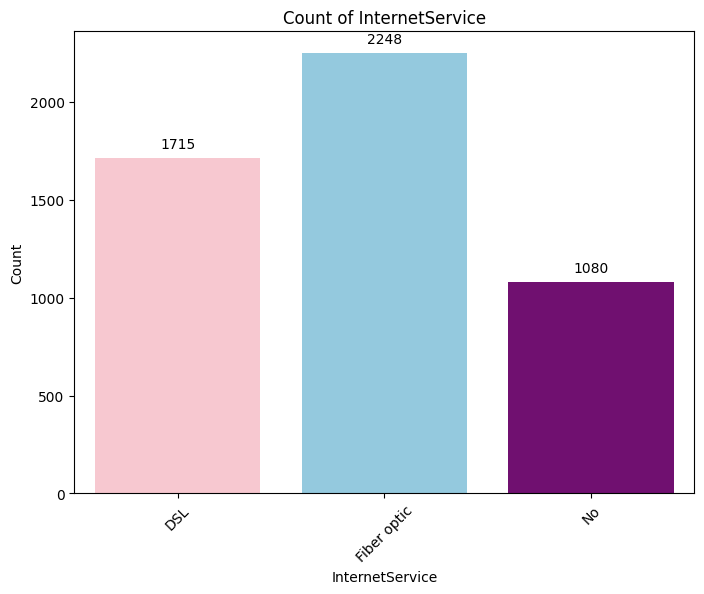

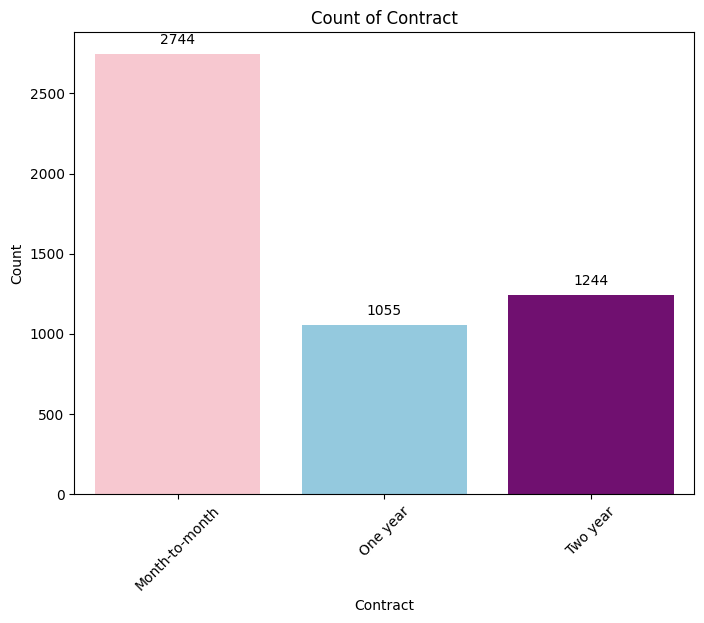

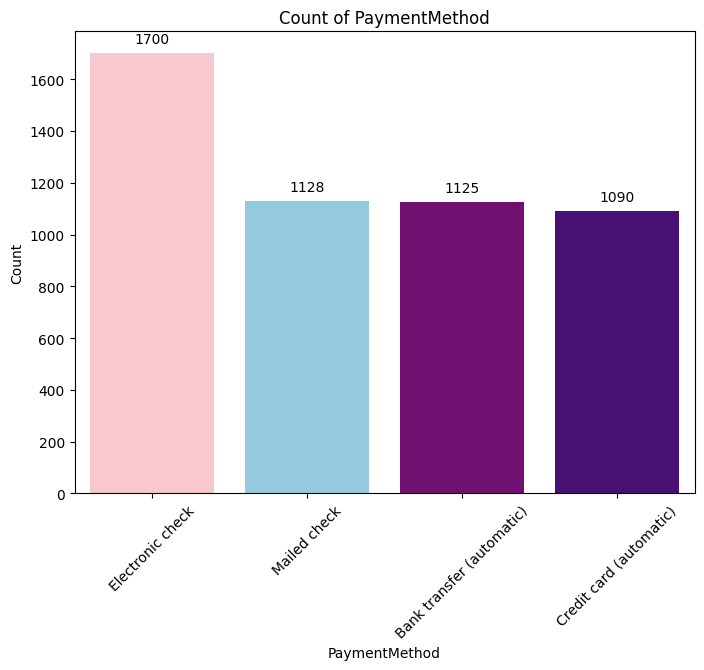

In [25]:
## countplot for categorical columns
# Define colors for the bars
colors = ['pink', 'skyblue', 'purple','indigo']

# Plot countplots for each categorical column with annotations and custom colors
for column in cat_columnsdf.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    ax = sns.countplot(data=cat_columnsdf, x=column, palette=colors)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    # Add annotations to the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

    plt.show()

### **Bivariate Analysis**

In [26]:
for column in training_df.columns:
    if (training_df[column].dtype!='O') & (len(training_df[column].unique())>2):
         ##Visual rep of if the customer churned inside the columns
        fig = px.box(training_df[numeric],y=training_df[column],color=training_df['Churn'],labels={'color':'Churn'},title =
                     (f"a visual rep of the {column} column split by if the customer churned"))
        fig.show()

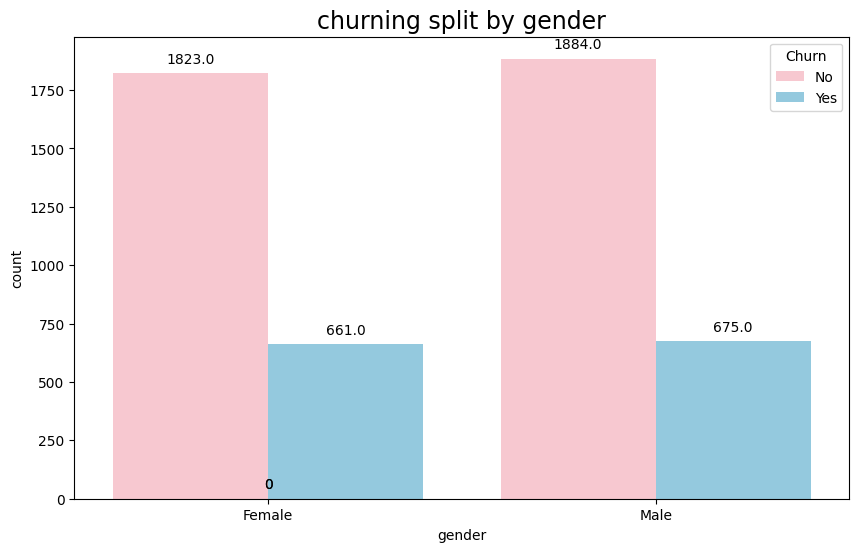

In [27]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=training_df, x='gender', hue='Churn', palette={'No': 'pink', 'Yes': 'skyblue'})
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title("churning split by gender",fontsize=17)

plt.show()

Text(0.5, 1.0, 'monthly charges split by  gender and churning')

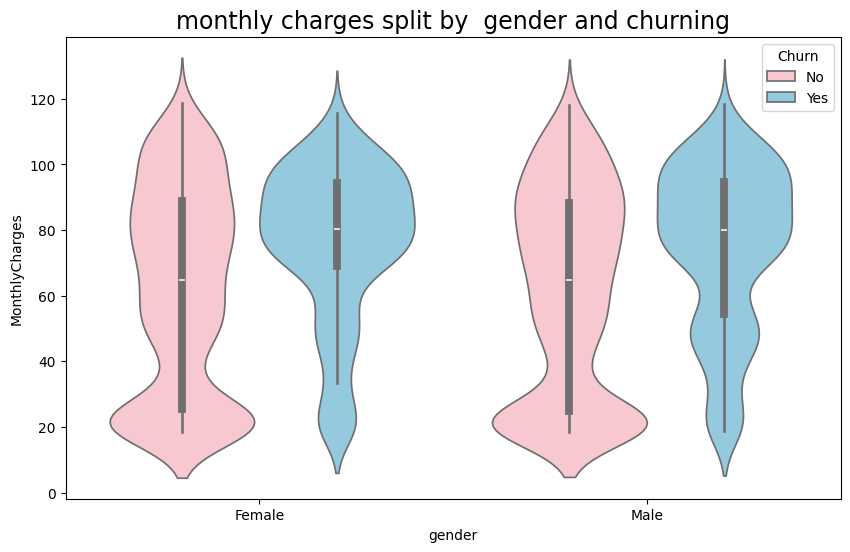

In [28]:
plt.figure(figsize=(10,6))
sns.violinplot(data=training_df,x="gender",y="MonthlyCharges",hue="Churn",palette={'No':'pink','Yes':'skyblue'})
plt.title('monthly charges split by  gender and churning',fontsize=17)

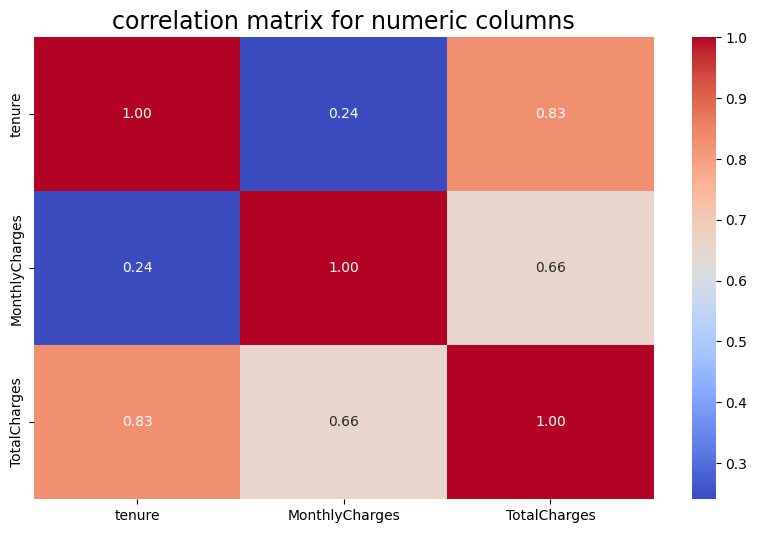

In [29]:
numeric= [column for column in training_df.columns if ((training_df[column].dtype)!='O') & (len(training_df[column].unique())>2)] 
corelation = training_df[numeric].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corelation ,annot=True, fmt='.2f',cmap='coolwarm')
plt.title('correlation matrix for numeric columns',fontsize=17)
plt.show()

## **Findings**
1. The train-df dataset has 21 columns and 5043 rows

2. Most customers were of the male gender, were not SeniorCitizens , lacked dependents and patners

3. The average monthlycharges was around 65 and majority of them did not churn

4. Majority of the customers prefferred Fiber optic internet service and a month to month type of contract

5. The customers were averagely charged 64.7 monthly with the highest charge on monthly basis being 118.65

6. For customers that churned their monthly charges were about 80 while those that did not churn had monthlycharges of around 60

7. Customers that churned had their total charges at around 702.2 while those that did not churn had their totalcharges at around 1730

8. More males churned 279 than females 277 

9. For males that churned their monthly charges were around 75 while those that did not churn was around 65

10. For females that churned their monthly charges were around 65 while those that did not churn their monthly charges was around 70

11. Tenure is highly correlated with the TotalCharges column 

12. MonthlyCharge is also highly correlated with the Total Charges column



### ***ANSWERING BUSINESS QUESTIONS***

#### ***Question one***
1. What is the relationship between totalcharges and customers churning?

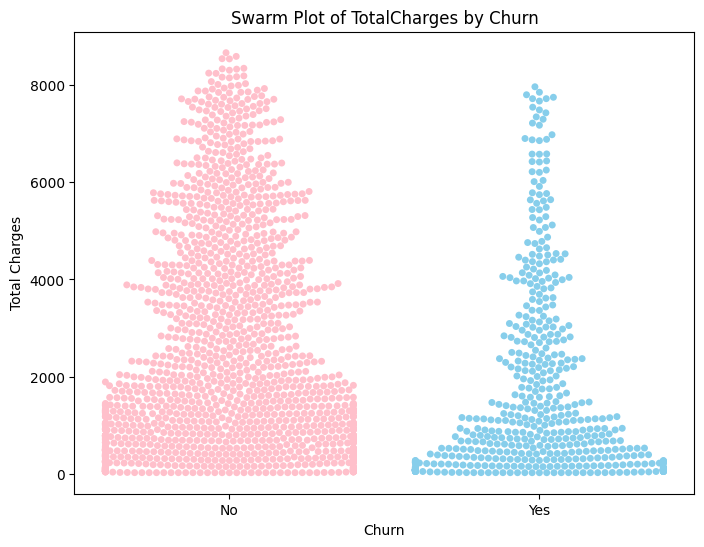

In [30]:
## swarmplot
plt.figure(figsize=(8, 6))
#sns.swarmplot(x='Churn', y='TotalCharges', data=df1, palette={'No':'pink', 'Yes': 'skyblue'})
sns.swarmplot(x='Churn', y='TotalCharges', data=training_df, palette={'No': 'pink', 'Yes': 'skyblue'})
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.title('Swarm Plot of TotalCharges by Churn')
plt.show()

--> Customers that churned most have them have their totalcharges to be below 2000.

--> Those that did not churn, most of them have their totalcharges above 2000 compared to those that churned

#### ***Question two***
2. What is the relationship between monthlycharges and customers churning?

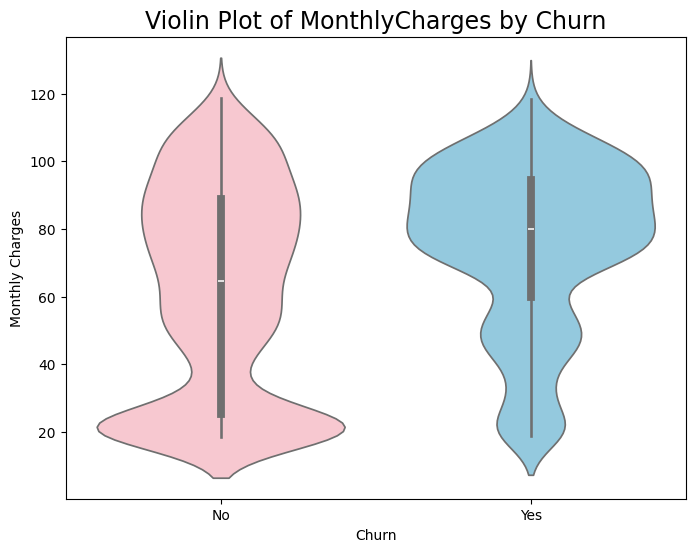

In [31]:
## violinplot
plt.figure(figsize=(8, 6))
#sns.swarmplot(x='Churn', y='TotalCharges', data=df1, palette={True: 'pink', False: 'skyblue'})
sns.violinplot(x='Churn', y='MonthlyCharges', data=training_df, palette={'No': 'pink', 'Yes': 'skyblue'})
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Violin Plot of MonthlyCharges by Churn',fontsize=17)
plt.show()

Those that churned were mostly charged around 80 monthly while those that did not churn were charged around 65 monthly 

#### ***Question three***
3. Which customer gender churned the most?

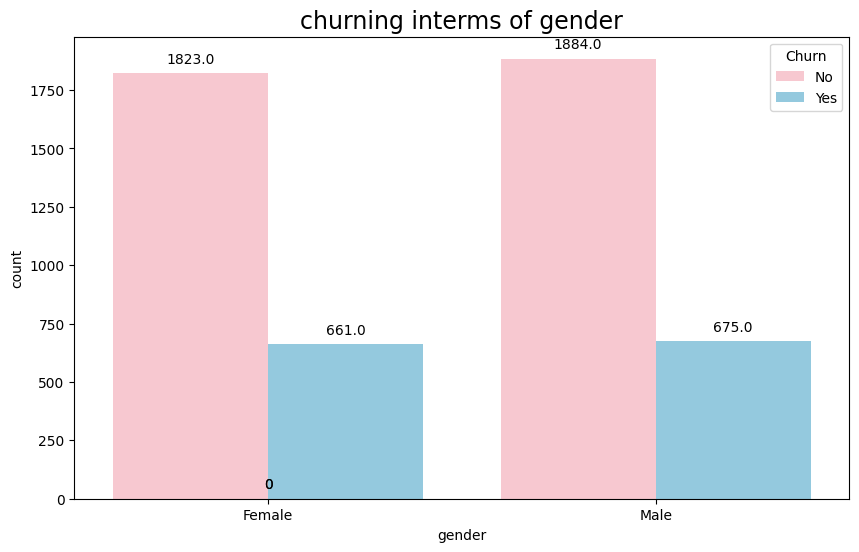

In [32]:
plt.figure(figsize=(10,6))
palette = {'No': 'pink', 'Yes': 'skyblue'}
ax=sns.countplot(data=training_df, x='gender', hue='Churn', palette=palette)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), 
                textcoords='offset points')

plt.title("churning interms of gender",fontsize=17)

plt.show()

The male gender churned the most 396 than the female gender 384

#### ***Question Four***
4. Between the male and female gender who were charged the most on a monthly basis?


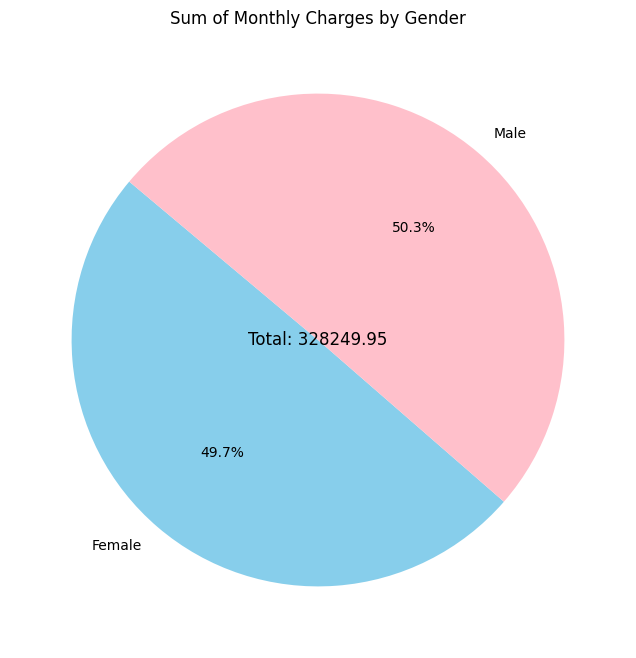

In [33]:

# Grouping MonthlyCharges by gender and calculating the sum
sum_monthly_charges_by_gender = training_df.groupby('gender')['MonthlyCharges'].sum()

# Plotting the pie chart with custom colors
plt.figure(figsize=(8, 8))
colors = ['skyblue', 'pink']
plt.pie(sum_monthly_charges_by_gender, labels=sum_monthly_charges_by_gender.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Add the sum values inside the pie chart with custom color
total = sum(sum_monthly_charges_by_gender)
plt.text(0, 0, f'Total: {total:.2f}', fontsize=12, color='black', va='center', ha='center')

plt.title('Sum of Monthly Charges by Gender')
plt.show()

The male gender was charged the most on a monthly basis 99194.50 while the female gender was charged 9684.70

#### ***Question Five***
5. Customers that churned were mostly using which type of InternetService?

<Figure size 1200x600 with 0 Axes>

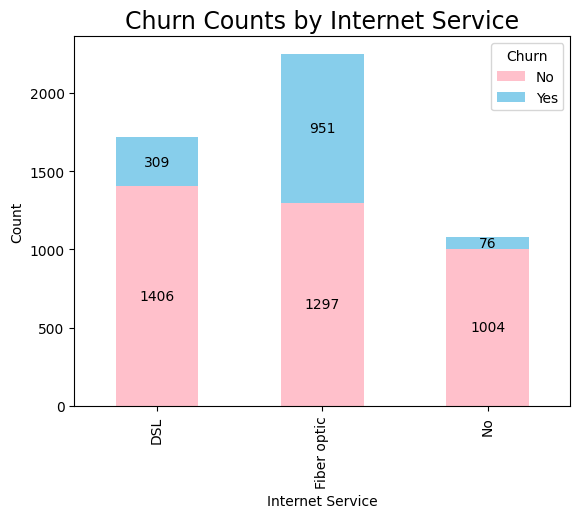

In [34]:
# Define custom colors
colors = {'No': 'pink', 'Yes': 'skyblue'}

# Grouping by 'InternetService' and 'Churn' and counting occurrences
grouped_counts =training_df.groupby('InternetService')['Churn'].value_counts()

# Plotting the bar plot with custom colors
plt.figure(figsize=(12, 6))
ax = grouped_counts.unstack().plot(kind='bar', stacked=True, color=colors)

# Adding annotations to each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='black')

plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Churn Counts by Internet Service',fontsize=17)
plt.legend(title='Churn')
plt.show()

most customers that churned were using fiber optic 570 

while most of them that did not churn using DSL 835

### ***RECOMMENDATIONS***
1. Since customers that churned were mostly charged around 80 on a monthly basis ,while those that did not churn were charged around 65 , we recommend the company to charge less than 65 to keep  more customers 

2. The male gender churned the most compared to the female gender . This is because they were charged more ,thus reducing the amount charged to the males would perhaps keep them .

3. Customers using the DSL , majority them did not churn . Thus the company should advise more of its customers to use the DSL internet service

### ***HYPOTHESIS TESTING***

**(H0)** ***Null Hypothesis:*** There is no significant relationship between MonthlyCharges and whether a customer churns

**(H1)** ***Alternative Hypothesis:*** There is significant relationship between MonthlyCharges and whether a customer churns

In [35]:
## Use mann-whitney u test as the data is not normal
# Separate data for churn and non-churn groups
churn_group = training_df[training_df['Churn'] == 'Yes']['MonthlyCharges']
non_churn_group = training_df[training_df['Churn'] == 'No']['MonthlyCharges']

#perform Mannwhitney test 
statistic , p_value = mannwhitneyu(churn_group,non_churn_group ,alternative='two-sided')

# results
print(f'mann-whitney u statistic:,{statistic}')
print(f'p-value:{p_value}')

## interpration
alpha = 0.05
if p_value > alpha:
    print("fail to reject null hypothesis , Thus MonthlyCharges has no significant relationship with whether a customer churns")
else:
    print("reject null hypothesis , Thus MonthlyCharges has significant relationship with whether a customer churns")

mann-whitney u statistic:,3100791.0
p-value:1.2019873209608733e-42
reject null hypothesis , Thus MonthlyCharges has significant relationship with whether a customer churns


## **Data preparation**

In [36]:
## checking if the data is Imbalanced
bal_df=training_df['Churn'].value_counts().rename('Total').reset_index()
bal_df['ratio']= (bal_df['Total'])/(bal_df['Total'].sum())
#bal_df['ratio'] = bal_df['Total'].apply(lambda x:x/bal_df['Total'].sum()*100)

print(f'The dataset is not balanced. 73% of the dataset is of customers not churning while only 26% is of customers that churned')
bal_df

The dataset is not balanced. 73% of the dataset is of customers not churning while only 26% is of customers that churned


,Churn,Total,ratio
0,No,3707,0.735078
1,Yes,1336,0.264922


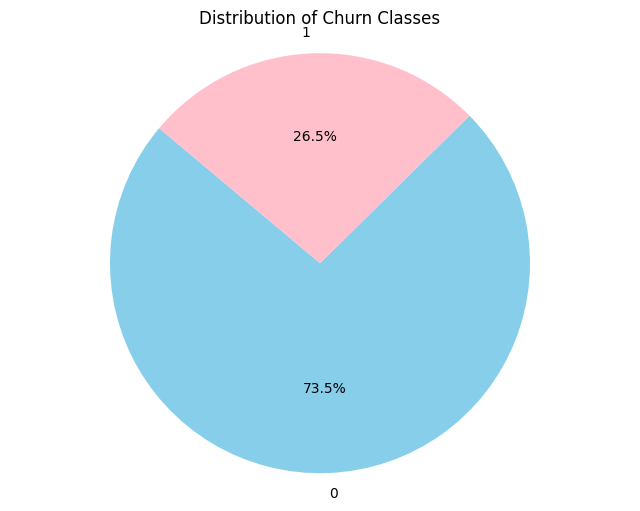

In [37]:

# Extract counts and labels from the DataFrame
counts = bal_df['Total']
labels = bal_df.index

# Create a pie chart with counts
plt.figure(figsize=(8, 6))
colors = ['skyblue', 'pink']
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Distribution of Churn Classes")
plt.show()


### **Training on unbalanced dataset**

In [38]:
# setting our target variable(y) and independent variables (X)
X = training_df.drop(['Churn'],axis=1) #independent variables
y = training_df['Churn'] # #target variables
y.isnull().sum()
#X

0

In [39]:
# splitting the data into parts that will be trained and that will be tested
X_train , X_test , y_train , y_test = train_test_split(X ,y , train_size=0.8 , random_state=2 , stratify=y)
#X_train.nunique()

In [40]:
# encoding our target variables
encoder = LabelEncoder() # defining our encoder
y_train_encoded = encoder.fit_transform(y_train) #encoding the y_train data
y_test_encoded = encoder.transform(y_test) # encoding the y_test data
#y_test_encoded


### ***Preparing pipelines***

In [41]:
## preparing pipelines 
##

Robust_scaler = RobustScaler()  # defining the scaler to be used
cat_col = X.select_dtypes('object').columns # setting the categoriacal columns
num_col = X.select_dtypes('number').columns # setting the numerical columns
#cat_col
#num_col
num_pipeline = Pipeline(steps=[
    ('num_imputer',SimpleImputer(strategy='median')),
    ('scaler',RobustScaler())
])# setting the numerical pipelins

cat_pipeline = Pipeline(steps=[
    ('cat_imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder())
])# setting the categorical pipelines

preprocessor = ColumnTransformer(transformers=[
    ('numeric_pipeline',num_pipeline,num_col),
    ('categorical_pipeline',cat_pipeline,cat_col)
])## combining both numerical and categorical column



## **Modelling**

### **Training on unbalanced data**

In [48]:
## Modelling 
all_pipelines = {} ## creating a dictionary to store our pipelines

metric_table = pd.DataFrame(columns=['model_name','accuracy','precision','recall','f1-score']) # defining our metric table

models = [
    ('decision_tree',DecisionTreeClassifier(random_state=42)),
    ('logistic_regression',LogisticRegression(random_state=42)),
    ('knn',KNeighborsClassifier(n_neighbors=5)),
    ('random_forest',RandomForestClassifier(random_state=42)),
    ('xgboost',XGBClassifier(random_state=42)),
    #('catboost',CatBoostClassifier(random_state=42))
] # defining the models that will be used for training

for model_name , classifier in models: # setting a loop for every model that will be used in training
    
    final_pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('classifier',classifier)
    ])# creating final pipeline with preprocessor estimates
    
    final_pipeline.fit(X_train , y_train_encoded) # fitting the data into the final pipeline 
    
    all_pipelines[model_name] = final_pipeline
    
    y_pred = final_pipeline.predict(X_test)
    
    metrics = classification_report(y_test_encoded,y_pred,output_dict=True)
    
    accuracy = metrics['accuracy']
    
    precision = metrics['weighted avg']['precision']
    
    recall = metrics['weighted avg']['recall']
    
    f1 = metrics['weighted avg']['f1-score']
    
    metric_table.loc[len(metric_table)] = [model_name,accuracy,precision,recall,f1]
    
metric_table.sort_values(by='f1-score',ascending=False)

    

,model_name,accuracy,precision,recall,f1-score
1,logistic_regression,0.800793,0.793990,0.800793,0.796399
3,random_forest,0.797820,0.787910,0.797820,0.790336
4,xgboost,0.778989,0.770694,0.778989,0.773784
2,knn,0.751239,0.738934,0.751239,0.743453
0,decision_tree,0.743310,0.742391,0.743310,0.742844


### **Training on balanced dataset**

In [89]:
## Modelling 
all_balanced_pipelines = {} ## creating a dictionary to store our pipelines
all_confusion_matrix={}
balanced_metric_table = pd.DataFrame(columns=['model_name','accuracy','precision','recall','f1-score']) # defining our metric table
models = [
    ('decision_tree',DecisionTreeClassifier(random_state=42)),
    ('logistic_regression',LogisticRegression(random_state=42)),
    ('knn',KNeighborsClassifier(n_neighbors=5)),
    ('random_forest',RandomForestClassifier(random_state=42)),
    ('xgboost',XGBClassifier(random_state=42)),
    #('catboost',CatBoostClassifier(random_state=42))
]


for model_name , classifier in models: # setting a loop for every model that will be used in training
    
    balanced_pipeline = imbpipeline(steps=[
        ('preprocessor',preprocessor),
        ('smote_sampler',SMOTE(random_state=0)),
        ('feature_selection',SelectKBest(mutual_info_classif,k='all')),
        ('classifier',classifier)
    ])# creating final pipeline with preprocessor estimates

    balanced_pipeline.fit(X_train , y_train_encoded) # fitting the data into the final pipeline 
    
    all_balanced_pipelines[model_name] = balanced_pipeline
    ## a
    y_pred = balanced_pipeline.predict(X_test)
    
    #generate all matrix predictions
    conf_matrix = confusion_matrix(y_test_encoded,y_pred)
    all_confusion_matrix[model_name] = conf_matrix
    
    # generate classification report for each pipeline or model
    balanced_metrics = classification_report(y_test_encoded,y_pred,output_dict=True)
    
    accuracy = balanced_metrics['accuracy']
    
    precision = balanced_metrics['weighted avg']['precision']
    
    recall =balanced_metrics['weighted avg']['recall']
    
    f1 = balanced_metrics['weighted avg']['f1-score']
    
    balanced_metric_table.loc[len(balanced_metric_table)] = [model_name,accuracy,precision,recall,f1]
    
balanced_metric_table.sort_values(by='f1-score',ascending=False)

    

,model_name,accuracy,precision,recall,f1-score
3,random_forest,0.793855,0.788861,0.793855,0.790932
4,xgboost,0.782953,0.781172,0.782953,0.782021
1,logistic_regression,0.748266,0.804240,0.748266,0.761472
0,decision_tree,0.729435,0.747065,0.729435,0.736414
2,knn,0.661051,0.728494,0.661051,0.679552


### **Findings**
1. The models score highly when using unbalanced data unlike when using balanced data

#### **Visualizing the confusion matrix**

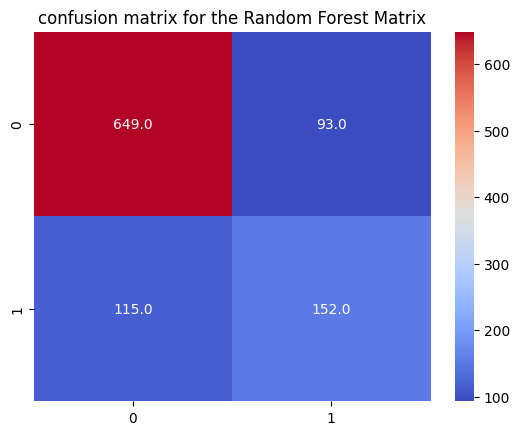

In [67]:
forest_matrix = all_confusion_matrix['random_forest']

sns.heatmap(forest_matrix,annot=True,cmap='coolwarm',fmt='.1f')
plt.title('confusion matrix for the Random Forest Matrix')
plt.show()

### **findings**
1. The model is not performing at the best as we would wish 
2. out of 267 positives  it predicts only 152 as true positives correctly that is 56% accurate .This can be improved

### **visualizing ROC_AUC**

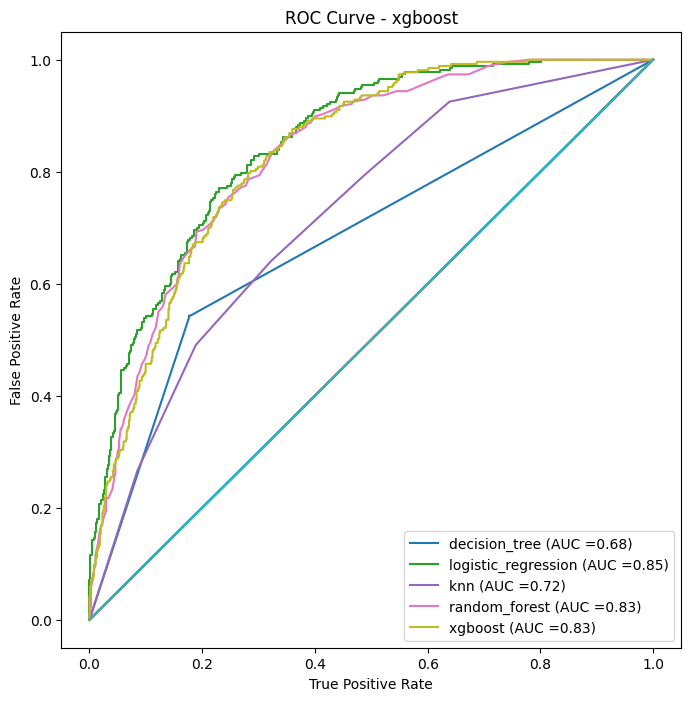

In [72]:


fig, ax = plt.subplots(figsize = (8,8))

# add confusion matrix to all pipelines
all_confusion_matrix = {}

all_roc_data = {}

for model_name, pipeline in all_pipelines.items():
    y_score = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_encoded, y_score)

    roc_auc = auc(fpr, tpr)

    roc_data_df = pd.DataFrame({'False Positive rate': fpr, 'True Positive Rate': tpr, 'Thresholds': thresholds})

    all_roc_data[model_name] = roc_data_df

    ax.plot(fpr, tpr, label= f'{model_name} (AUC ={roc_auc:.2f})')

    ax.plot([0,1], [0,1])
    ax.set_ylabel('False Positive Rate')
    ax.set_xlabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {model_name}') 

plt.legend() 
plt.show()   




### **Findings** 
1. the higher the curve the better 
2. The better model is logistic regression which covers 0.85

In [77]:
## getting the thresholds at which our model will perform at its best
log_pipeline = all_pipelines['logistic_regression']
all_roc_data['logistic_regression'].tail(50)

,False Positive rate,True Positive Rate,Thresholds
221,0.397574,0.910112,0.328599
222,0.409704,0.910112,0.317673
223,0.409704,0.913858,0.316856
224,0.413747,0.913858,0.315445
225,0.413747,0.917603,0.314666
226,0.421833,0.917603,0.312449
227,0.421833,0.921348,0.312294
228,0.427224,0.921348,0.309256
229,0.427224,0.925094,0.307285
230,0.438005,0.925094,0.294218


<Axes: >

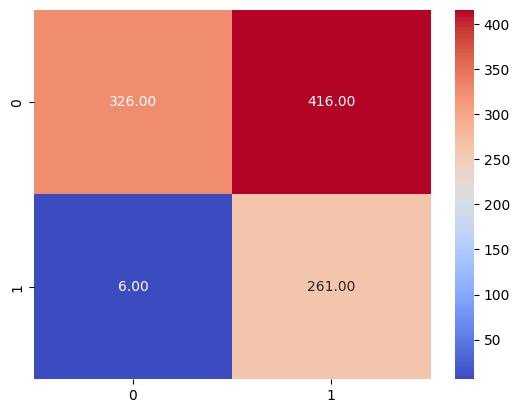

In [78]:
threshold = 0.16012 ## setting the threshold at 0.16012

y_pred_proba = log_pipeline.predict_proba(X_test)[:,1]

binary_predictions = (y_pred_proba > threshold).astype(int)
threshold_matrix = confusion_matrix(y_test_encoded, binary_predictions)

# plot heat map of threshold conf_matrix
sns.heatmap(threshold_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')

### **Findings**
1. Our model now performs better after setting the threshold at 0.16012
2. out of 267 it predicts 261 as true positive that is 97%

### **Hyperparameter Tuning**

In [90]:


# Dictionary to store the best estimators for each model
best_estimators = {}

# Loop over each model and its corresponding parameter grid
for model_name, param_grid in param_grids.items():
    print(f"Hyperparameter tuning for {model_name}...")
    
    # Get the pipeline for the current model
    pipeline = all_balanced_pipelines[model_name]
    
    # Initialize GridSearchCV with the pipeline and parameter grid
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
    
    # Perform grid search
    grid_search.fit(X_train, y_train_encoded)
    
    # Store the best estimator
    best_estimators[model_name] = grid_search.best_estimator_
    
    # Print the best hyperparameters and the corresponding F1-score
    print(f"Best hyperparameters for {model_name}:")
    print(grid_search.best_params_)
    print(f"Best F1-score: {grid_search.best_score_}\n")

# Now you can use the best_estimators dictionary to access the best-tuned models for each classifier


Hyperparameter tuning for decision_tree...


Best hyperparameters for decision_tree:
{'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Best F1-score: 0.7606414608422829

Hyperparameter tuning for logistic_regression...
Best hyperparameters for logistic_regression:
{'classifier__C': 100, 'classifier__max_iter': 300, 'classifier__solver': 'newton-cholesky'}
Best F1-score: 0.7697204129911521

Hyperparameter tuning for knn...
Best hyperparameters for knn:
{'classifier__n_neighbors': 3}
Best F1-score: 0.6899128567034534

Hyperparameter tuning for random_forest...
Best hyperparameters for random_forest:
{'classifier__max_depth': 10, 'classifier__n_estimators': 50}
Best F1-score: 0.7966525461338931



In [106]:
# Get the models with the best hyperparameters
def get_best_models(params):
    best_models = []
    for model_name, grid_search in params.items():
        best_model = grid_search.best_estimator_
        best_models.append((model_name, best_model))    
    
    return best_models
 
best_models = get_best_models(params)

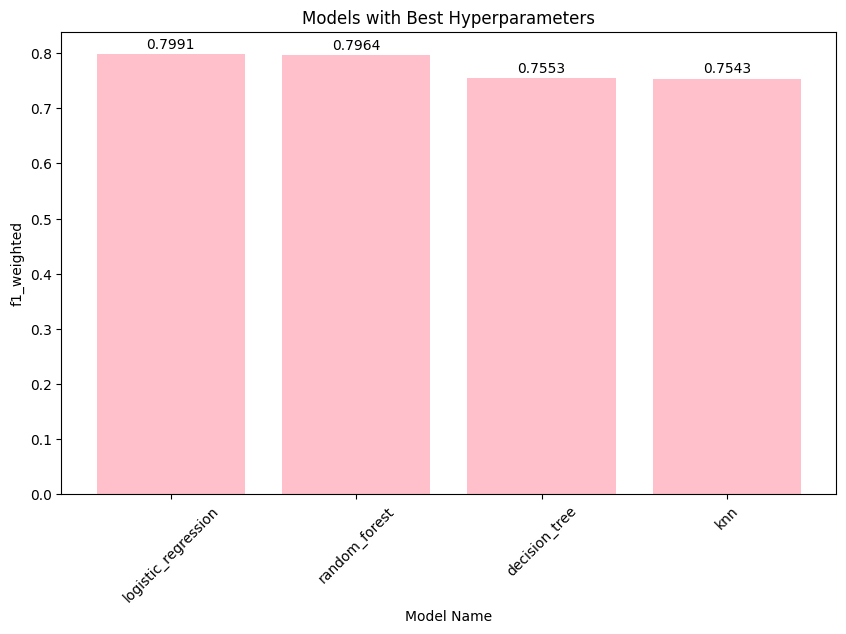

In [138]:
# Get models f1_weighted scores and names
model_names = [model_name for model_name in search_histories.keys()]
model_scores = [search_history['mean_test_f1_weighted'].max() for search_history in search_histories.values()]

# Create a DataFrame to for plot
df_models = pd.DataFrame({'model_name': model_names, 'f1-score': model_scores})
df_models = df_models.sort_values(by='f1-score', ascending=False)


# Create a bar chart
plt.figure(figsize=(10,6))
plt.bar(data=df_models, x='model_name', height='f1-score')

# Add text labels to the bars
for i, score in enumerate(df_models['f1-score']):
    plt.text(i, score+0.01, '{:1.4f}'.format(score), ha="center")

plt.xlabel('Model Name')
plt.ylabel('f1_weighted')
plt.title('Models with Best Hyperparameters')
plt.xticks(rotation=45)
plt.show()

In [140]:
# merging the dataframes i.e metric table and df models on the columns model_name and f1-score
metric_before_after_tuning_models = pd.merge(
    metric_table[['model_name', 'f1-score']], 
    df_models, 
    on='model_name', 
    how='inner', 
    suffixes=('_before', '_after')
).sort_values(ascending=False, by='f1-score_after')

metric_before_after_tuning_models#.sort_values(ascending=False,by='f1-score')

,model_name,f1-score_before,f1-score_after
1,logistic_regression,0.796399,0.799058
3,random_forest,0.790336,0.796393
0,decision_tree,0.742844,0.755297
2,knn,0.743453,0.754287


#### Compare models before and after hyperparameter tuning using f1 score  metric

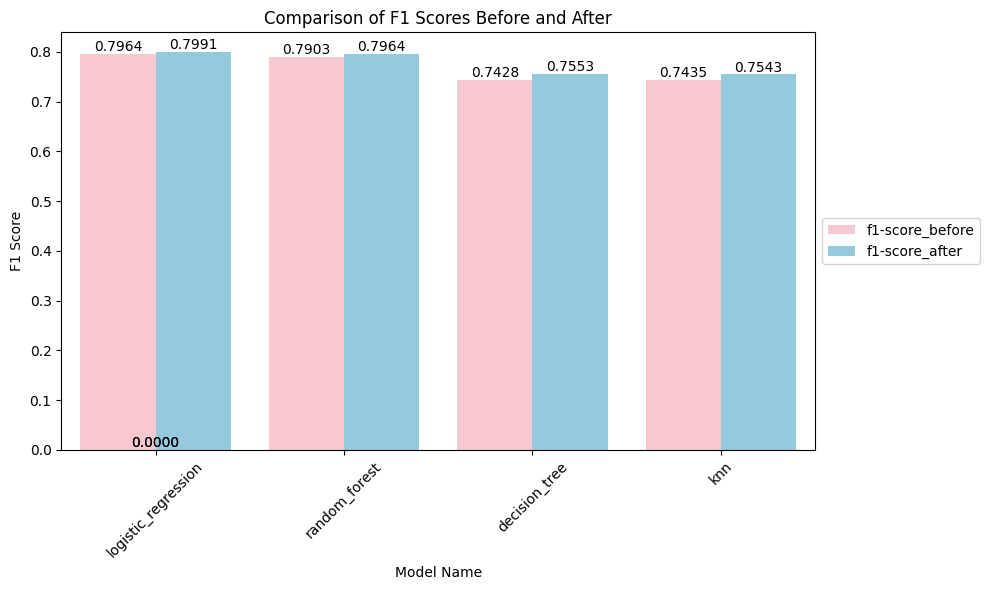

In [141]:
# Melt the DataFrame to combine f1_score_before and f1_score_after into a single column
metric_melted = metric_before_after_tuning_models.melt(id_vars='model_name', var_name='score_type', value_name='score')

# Set the figure size
plt.figure(figsize=(10, 6))
sns.set_palette(['pink', 'skyblue'])

# Plot the combined data
ax = sns.barplot(data=metric_melted, x='model_name', y='score', hue='score_type')
plt.title('Comparison of F1 Scores Before and After')
plt.xlabel('Model Name')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)

# Annotate the values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
    
# Move legend to the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

Through optimization of model hyperparameters, we identified the best configuration for each model, leading to significant performance gains. Hyperparameter tuning is crucial because machine learning model effectiveness is heavily influenced by these parameters.

Our approach resulted in performance improvement across all models, with the Logistic Regression model achieving the highest F1-score (0.796963). However, it's important to remember that the optimal model selection depends on the specific problem being addressed and the consequences of false positive results.

In [107]:
## getting our best model
best_model_name = df_models['model_name'].iloc[0]
best_model = dict(best_models).get(best_model_name)
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',...
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=10, max_iter=300, random_state=42,
                                    solver='newton-cholesky'))])

## **Feature importance**

In [108]:
# Get the feature names after transformation
feature_columns = best_model.named_steps['preprocessor'].get_feature_names_out()

# Remove unwanted prefixes and get the last part
feature_columns = np.array([col.split('__')[-1] for col in feature_columns])

# Display the feature columns
pd.DataFrame(feature_columns).rename(columns={0:'feature_columns'})

,feature_columns
0,tenure
1,MonthlyCharges
2,TotalCharges
3,gender_Female
4,gender_Male
5,SeniorCitizen_No
6,SeniorCitizen_Yes
7,Partner_No
8,Partner_Yes
9,Dependents_No


In [109]:
# Access the coefficients since best model is logistic regression
coefficients = best_model.named_steps['classifier'].coef_[0]

coefficients_df = pd.DataFrame({'Feature': feature_columns, 'Coefficient': coefficients})

# Magnitude of impact
coefficients_df['Absolute Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df.sort_values(by="Absolute Coefficient", ascending=False, inplace=True)

coefficients_df

,Feature,Coefficient,Absolute Coefficient
16,InternetService_Fiber optic,1.685542,1.685542
17,InternetService_No,-1.563936,1.563936
1,MonthlyCharges,-1.561767,1.561767
0,tenure,-1.525501,1.525501
32,Contract_Two year,-0.774976,0.774976
30,Contract_Month-to-month,0.738607,0.738607
29,StreamingMovies_Yes,0.322195,0.322195
28,StreamingMovies_No,-0.322195,0.322195
27,StreamingTV_Yes,0.260237,0.260237
26,StreamingTV_No,-0.260237,0.260237


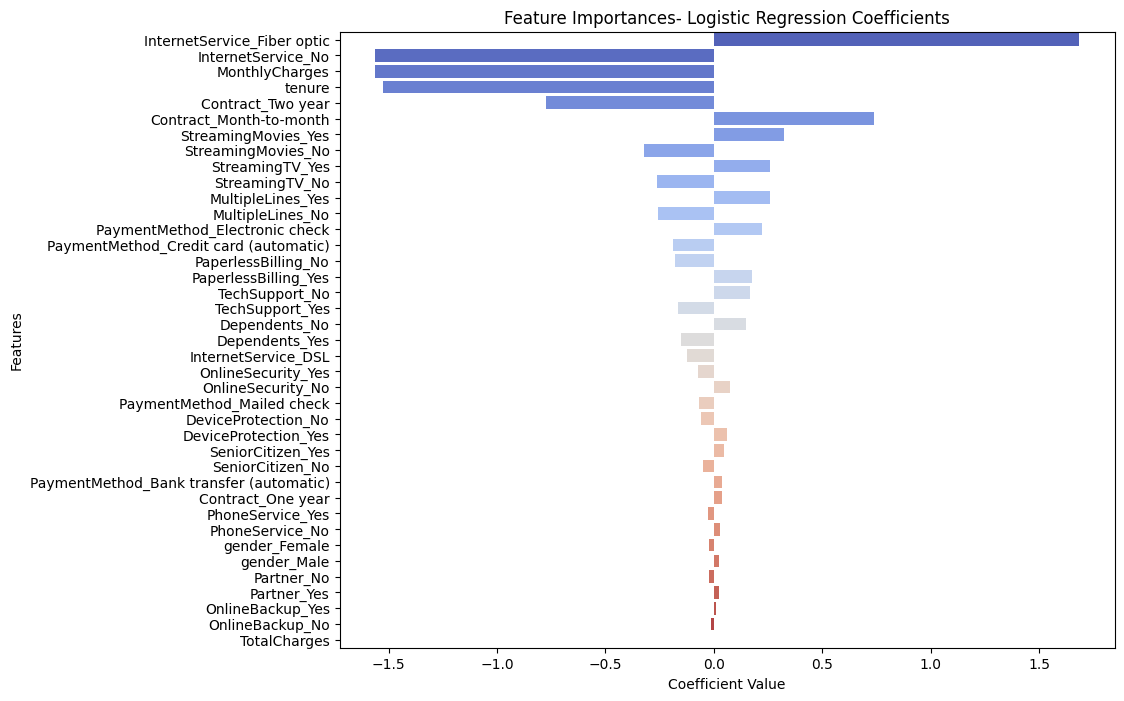

In [110]:
# Visualizing the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='coolwarm')
plt.title('Feature Importances- Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

### **Findings**
1. The Internet Service column i.e after encoding , the InternetService Fibre optics is the most significant feature
2. TotalCharges has the least impact

## **Evaluation** 

In [113]:
## generating a classification report for predictions made by the best model
y_test_pred = best_model.predict(X_test)
print(f'Classification report of the best model- {best_model_name}\n\n{classification_report(y_true=y_test_encoded, y_pred=y_test_pred)}')

Classification report of the best model- logistic_regression

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       742
           1       0.65      0.56      0.60       267

    accuracy                           0.80      1009
   macro avg       0.75      0.72      0.73      1009
weighted avg       0.79      0.80      0.80      1009



#### Preparing the test dataset before testing it

In [114]:
df3.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [115]:
## checking for the datatypes
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


#### Issues 
1. The Total charge column has wrong datatype
2. The seniorcitizen column values should be changed to align with the one used in training 
3. Phone service column should also be changed

In [118]:
# test_df['totalcharges'] = test_df['totalcharges'].
df3['TotalCharges'] = pd.to_numeric(df3['TotalCharges'], errors = 'coerce')## changing dtype to numeric 
#df3.info()


In [123]:
## replacing values to align with the correct ones used in training
df3['SeniorCitizen'] = df3['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [121]:
df3.drop(columns=['customerID'], inplace=True)

In [125]:
## for loop to replace the values in df3 to align with those used in training
for column in df3.columns:
    df1[column]=df3[column].replace({False:"No",True:"Yes",None:"No"})
    print(column,'unique values')
    print(df3[column].unique())
    print("=="*50) 

gender unique values
['Male' 'Female']
SeniorCitizen unique values
['No' 'Yes']
Partner unique values
['No' 'Yes']
Dependents unique values
['No' 'Yes']
tenure unique values
[12  9 27  1 24 14 32 11 38 54 29 44 59  3 18 67 22 33  5  2 72 16  8 23
 50 17 68 25 71 46 48 61 37 65 49 64 21 10  6 51 47 52 35 45  4 60 28 39
 30 55 58 26 43 56 36 13 70 69 41 15 19 31 34 66 40  7 53 63 42  0 57 62
 20]
PhoneService unique values
['Yes' 'No']
MultipleLines unique values
['Yes' 'No' 'No phone service']
InternetService unique values
['Fiber optic' 'No' 'DSL']
OnlineSecurity unique values
['No' 'No internet service' 'Yes']
OnlineBackup unique values
['No' 'No internet service' 'Yes']
DeviceProtection unique values
['No' 'No internet service' 'Yes']
TechSupport unique values
['No' 'No internet service' 'Yes']
StreamingTV unique values
['Yes' 'No internet service' 'No']
StreamingMovies unique values
['No' 'No internet service' 'Yes']
Contract unique values
['Month-to-month' 'One year' 'Two year']
Pa

In [126]:
## for loop to replace the values in df3 
#df3['SeniorCitizen']=df3['SeniorCitizen'].replace({0:'No',1:'Yes'})
for column in df3.columns:
    df3[column]=df3[column].replace({'No phone service':"No",'No internet service':"No"})
    print(column,'unique values')
    print(df3[column].unique())
    print("=="*50) 

gender unique values
['Male' 'Female']
SeniorCitizen unique values
['No' 'Yes']
Partner unique values
['No' 'Yes']
Dependents unique values
['No' 'Yes']
tenure unique values
[12  9 27  1 24 14 32 11 38 54 29 44 59  3 18 67 22 33  5  2 72 16  8 23
 50 17 68 25 71 46 48 61 37 65 49 64 21 10  6 51 47 52 35 45  4 60 28 39
 30 55 58 26 43 56 36 13 70 69 41 15 19 31 34 66 40  7 53 63 42  0 57 62
 20]
PhoneService unique values
['Yes' 'No']
MultipleLines unique values
['Yes' 'No']
InternetService unique values
['Fiber optic' 'No' 'DSL']
OnlineSecurity unique values
['No' 'Yes']
OnlineBackup unique values
['No' 'Yes']
DeviceProtection unique values
['No' 'Yes']
TechSupport unique values
['No' 'Yes']
StreamingTV unique values
['Yes' 'No']
StreamingMovies unique values
['No' 'Yes']
Contract unique values
['Month-to-month' 'One year' 'Two year']
PaperlessBilling unique values
['Yes' 'No']
PaymentMethod unique values
['Electronic check' 'Mailed check' 'Credit card (automatic)'
 'Bank transfer (aut

#### Using the Test Data to test our model and predict churn of customers

In [127]:
##using the bes_model to predict if a customer churns
predicted_churn = best_model.predict(df3)
predicted_churn

array([1, 0, 0, ..., 0, 0, 0])

In [130]:
# Create an array of corresponding labels
labels = np.array(['No', 'Yes']) # Index 0 is No, 1 is Yes
df3['predicted_churn'] = labels[predicted_churn] #creating the churn column
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,predicted_churn
0,Male,No,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1,Male,No,No,No,9,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.40,181.80,No
2,Male,No,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No
3,Male,No,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,No
4,Male,No,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes


### Visualize the predicted churn

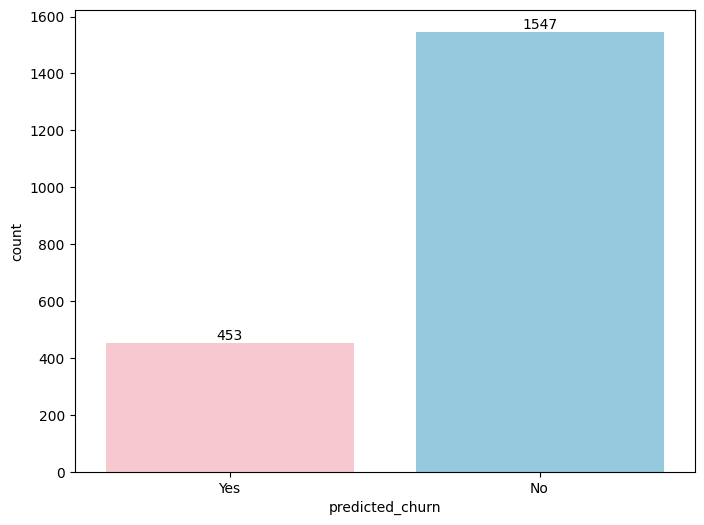

In [135]:
# Create the figure
plt.figure(figsize=(8, 6))

ax = sns.countplot(data=df3, x='predicted_churn', palette={'skyblue', 'pink'})

# Add count values on top of each bar
for p in ax.patches:
    count = int(p.get_height())  # Convert count to integer
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

## **Saving The Model**

In [134]:
import joblib

for model_name, pipeline in all_pipelines.items():
    joblib.dump(pipeline, f'C:\\Users\\USER\\Desktop\\customer churn prediction_LP2\\Customer-Churn-Prediction\\Trained Models\\{model_name}.joblib')

joblib.dump(encoder, f'C:\\Users\\USER\\Desktop\\customer churn prediction_LP2\\Customer-Churn-Prediction\\Trained models\\encoder.joblib')


['C:\\Users\\USER\\Desktop\\customer churn prediction_LP2\\Customer-Churn-Prediction\\Trained models\\encoder.joblib']